In [1]:
import os
import shutil
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folder = "dataset/celebA/"
img_folder = folder+'img_align_celeba/img_align_celeba/'

df = pd.read_csv(folder + "list_attr_celebA.csv")
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [3]:
new_df = df.sample(frac = .05, random_state = 42).reset_index(drop=True)
new_df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,093242.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,-1,-1,-1,-1,1
1,121414.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
2,010625.jpg,1,-1,-1,1,-1,-1,-1,1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,082524.jpg,-1,1,1,1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
4,073193.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,-1,-1,-1,-1


In [4]:
make_folder = lambda path : os.makedirs(path) if not os.path.exists(path) else 0

dest_folder = 'sample_data/'
make_folder(dest_folder)
dest_img_folder = dest_folder+'img/'
make_folder(dest_img_folder)

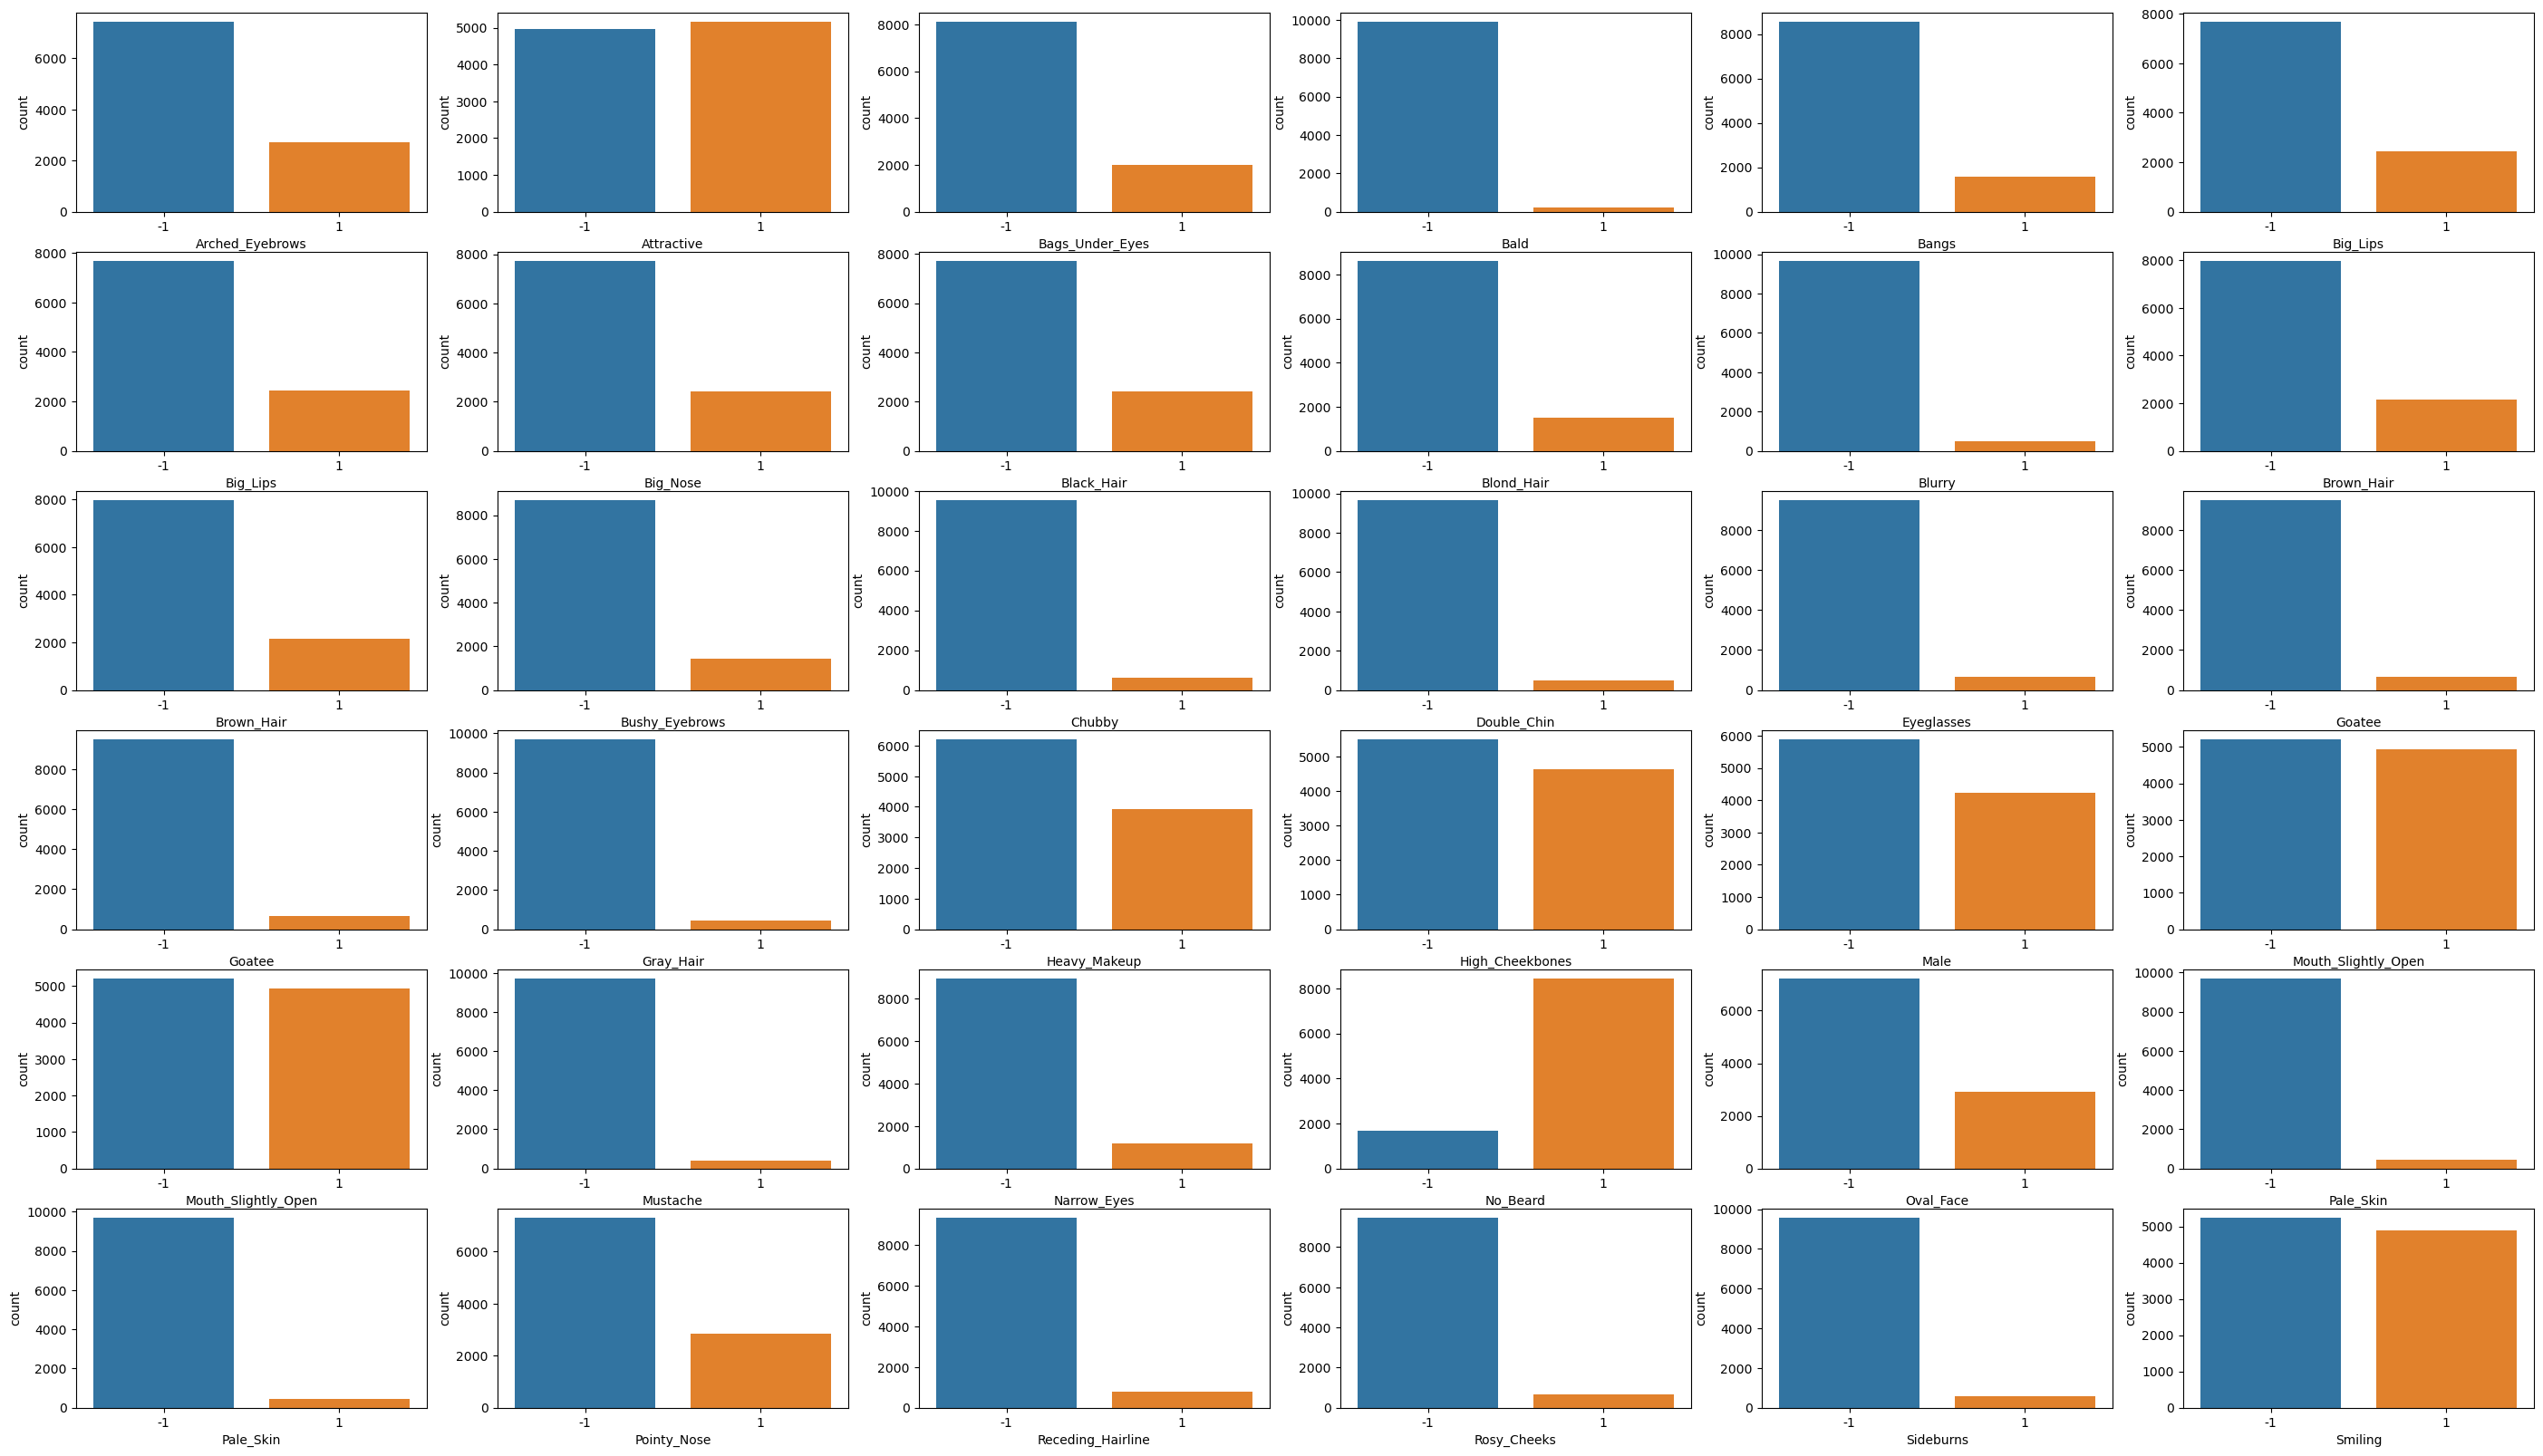

In [5]:
columns = [i for i in list(df.columns) if i not in ['image_id','5_o_Clock_Shadow']]
r,c = 6, 6
_, axs = plt.subplots(r,c, figsize=(35,20))
for i in range(r):
    for j in range(c):
        sns.countplot(data=new_df, x=columns[i*5 + j], ax=axs[i][j])
plt.show()

In [6]:
new_df.to_csv(dest_folder+'attr.csv', index=False)

In [7]:
def transfer_file(src, dest):
    shutil.copy(src, dest)

In [8]:
for img in list(new_df['image_id']):
    transfer_file(img_folder+img, dest_img_folder+img)